<a href="https://colab.research.google.com/github/Mahdi-A98/edlbook/blob/main/Notebooks/Chap10/10_4_Downsampling_and_Upsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10.4: Downsampling and Upsampling**

This notebook investigates the upsampling and downsampling methods discussed in section 10.4 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
import math

In [32]:
# Define 4 by 4 original patch
orig_4_4 = np.array([[1, 3, 5,3 ], [6,2,0,8], [4,6,1,4], [2,8,0,3]])
print(orig_4_4)
print(orig_4_4[:2, :5])


[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
[[1 3 5 3]
 [6 2 0 8]]


In [74]:
def subsample(x_in):
  x_out = np.zeros(( int(np.ceil(x_in.shape[0]/2)), int(np.ceil(x_in.shape[1]/2)) ))
  # x_out = np.zeros_like(x_in)
  # TODO -- write the subsampling routine
  # Replace this line
  kernel_size = 3
  stride = 2
  kernel_weights = np.array(
      [
          [1, 0.5, -1],
          [0.5, 1, 0.5],
          [-1, 0.5, 1],
      ]
  )

  pad_size = (kernel_size - 1) // 2
  padded_input = np.pad(x_in, pad_width=pad_size, mode='constant', constant_values=0)
  # Iterate over the output dimensions
  for i in range(x_out.shape[0]):
      for j in range(x_out.shape[1]):
          x = i * stride
          y = j * stride

          # Ensure the kernel fits within the padded input dimensions
          if x + kernel_size <= padded_input.shape[0] and y + kernel_size <= padded_input.shape[1]:
              x_out[i, j] = np.sum(
                  padded_input[x: x + kernel_size, y: y + kernel_size] * kernel_weights
              )

  return x_out

In [75]:
print("Original:")
print(orig_4_4)
print("Subsampled:")
print(subsample(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Subsampled:
[[ 7.5 14. ]
 [17.  -5. ]]


Let's try that on an image to get a feel for how it works:

In [58]:
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap10/test_image.png

--2025-08-11 06:41:15--  https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap10/test_image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60792 (59K) [image/png]
Saving to: ‘test_image.png’

test_image.png      100%[===================>]  59.37K  --.-KB/s    in 0.03s   

2025-08-11 06:41:15 (1.79 MB/s) - ‘test_image.png’ saved [60792/60792]



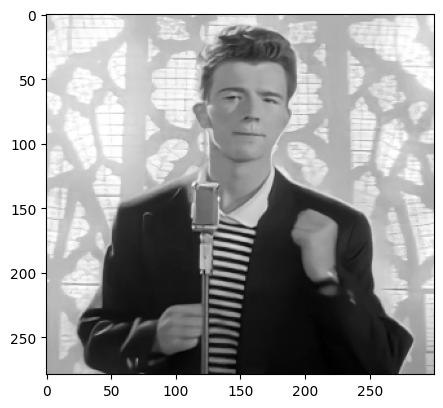

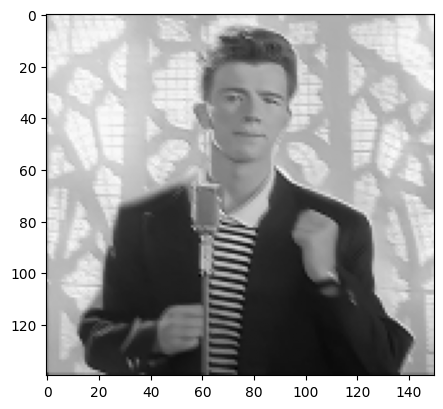

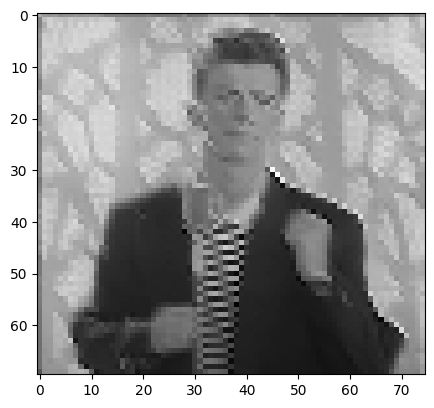

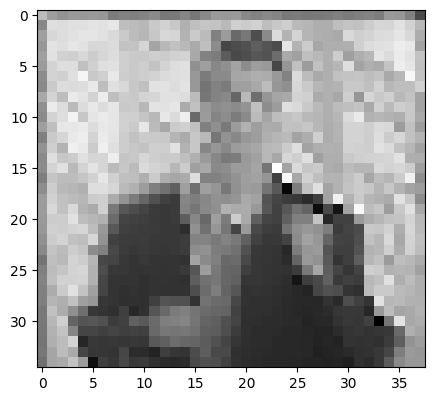

In [76]:
# load the image
image = Image.open('test_image.png')
# convert image to numpy array
data = asarray(image)
data_subsample = subsample(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_subsample, cmap='gray')
plt.show()

data_subsample2 = subsample(data_subsample)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample2, cmap='gray')
plt.show()

data_subsample3 = subsample(data_subsample2)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

In [81]:
# Now let's try max-pooling
def maxpool(x_in):
    output_height = int(np.floor(x_in.shape[0] / 2))
    output_width = int(np.floor(x_in.shape[1] / 2))

    # Calculate pool size dynamically
    pool_size_height = x_in.shape[0] // output_height
    pool_size_width = x_in.shape[1] // output_width

    # For this example, let's assume we're using a square pooling window
    pool_size = min(pool_size_height, pool_size_width)
    # Initialize the output array
    x_out = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            x = i * pool_size
            y = j * pool_size

            # Ensure that we do not exceed the bounds of the input array
            x_end = min(x + pool_size, x_in.shape[0])
            y_end = min(y + pool_size, x_in.shape[1])

            # Get the maximum value in the pooling window
            x_out[i, j] = np.max(x_in[x:x_end, y:y_end])

    return x_out

In [82]:
print("Original:")
print(orig_4_4)
print("Maxpooled:")
print(maxpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Maxpooled:
[[6. 8.]
 [8. 4.]]


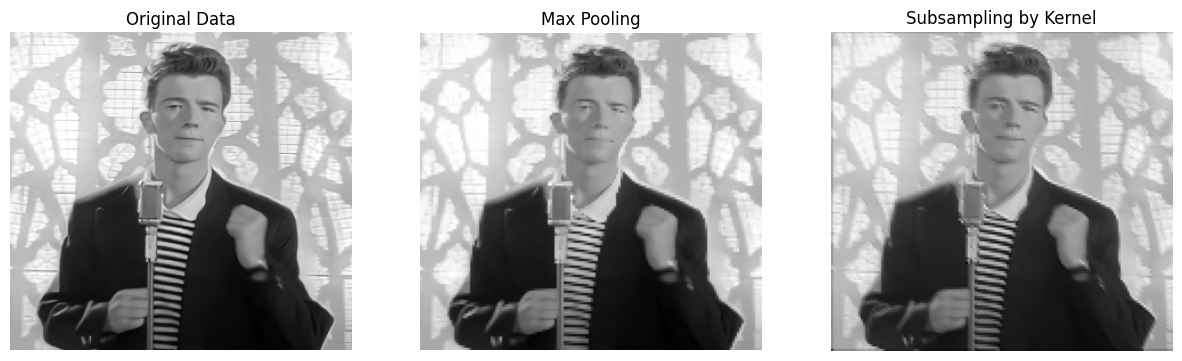

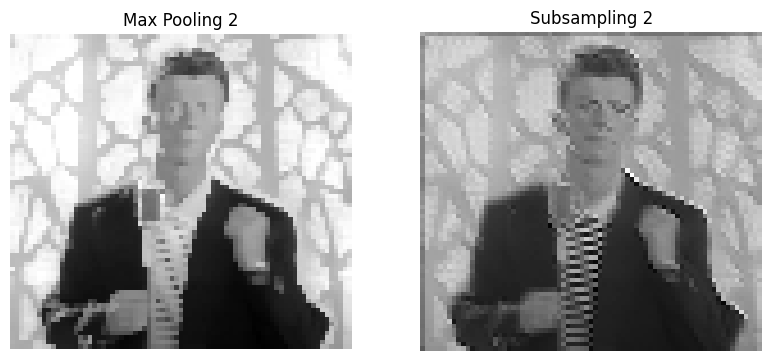

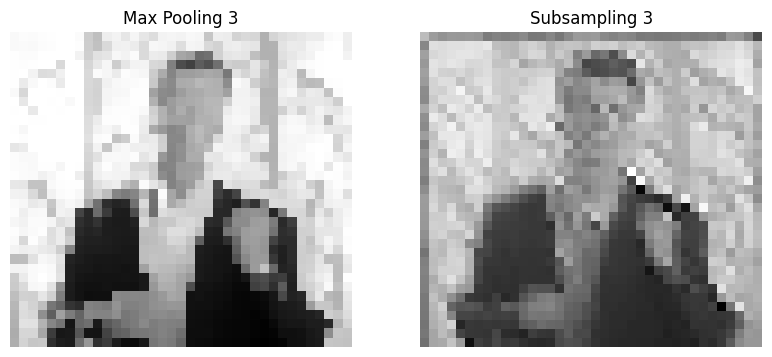

In [83]:
# Let's see what Rick looks like:
data_maxpool = maxpool(data);

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(data, cmap='gray')
plt.title('Original Data')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(data_maxpool, cmap='gray')
plt.title('Max Pooling')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(data_subsample, cmap='gray')
plt.title('Subsampling by Kernel')
plt.axis('off')

plt.show()

# Further max pooling and subsampling
data_maxpool2 = maxpool(data_maxpool)
data_subsample2 = subsample(data_subsample)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(data_maxpool2, cmap='gray')
plt.title('Max Pooling 2')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(data_subsample2, cmap='gray')
plt.title('Subsampling 2')
plt.axis('off')

plt.show()

data_maxpool3 = maxpool(data_maxpool2)
data_subsample3 = subsample(data_subsample2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(data_maxpool3, cmap='gray')
plt.title('Max Pooling 3')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(data_subsample3, cmap='gray')
plt.title('Subsampling 3')
plt.axis('off')

plt.show()

You can see that the stripes on his shirt gradually turn to white because we keep retaining the brightest local pixels.

In [84]:
# Finally, let's try mean pooling
def meanpool(x_in):
    output_height = int(np.floor(x_in.shape[0] / 2))
    output_width = int(np.floor(x_in.shape[1] / 2))

    # Calculate pool size dynamically
    pool_size_height = x_in.shape[0] // output_height
    pool_size_width = x_in.shape[1] // output_width

    # For this example, let's assume we're using a square pooling window
    pool_size = min(pool_size_height, pool_size_width)
    # Initialize the output array
    x_out = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            x = i * pool_size
            y = j * pool_size

            # Ensure that we do not exceed the bounds of the input array
            x_end = min(x + pool_size, x_in.shape[0])
            y_end = min(y + pool_size, x_in.shape[1])

            # Get the maximum value in the pooling window
            x_out[i, j] = np.mean(x_in[x:x_end, y:y_end])

    return x_out

In [85]:
print("Original:")
print(orig_4_4)
print("Meanpooled:")
print(meanpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Meanpooled:
[[3. 4.]
 [5. 2.]]


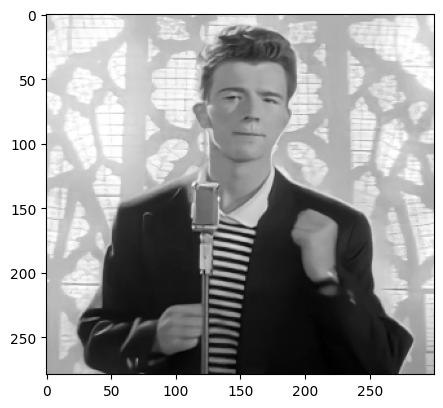

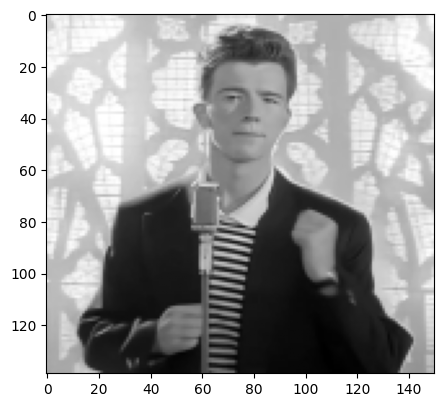

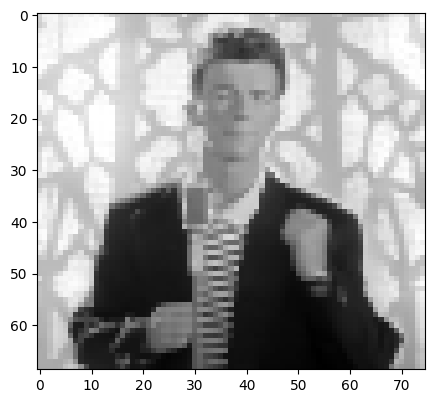

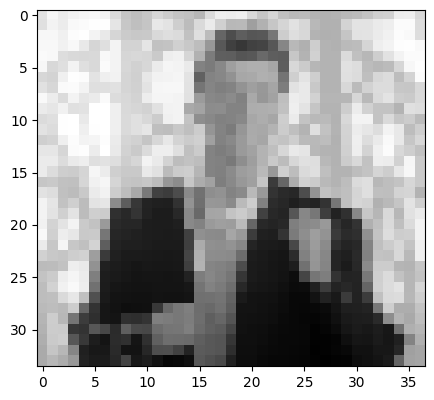

In [86]:
# Let's see what Rick looks like:
data_meanpool = meanpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool, cmap='gray')
plt.show()

data_meanpool2 = meanpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool2, cmap='gray')
plt.show()

data_meanpool3 = meanpool(data_meanpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

Notice that the three low resolution images look quite different. <br>

Now let's upscale them again

In [87]:
# Define 2 by 2 original patch
orig_2_2 = np.array([[6, 8], [8,4]])
print(orig_2_2)

[[6 8]
 [8 4]]


In [106]:
# Let's first use the duplication method
def duplicate(x_in):
    # Create an output array that is twice the size of the input
    x_out = np.zeros((x_in.shape[0] * 2, x_in.shape[1] * 2))

    # Fill the output array by duplicating each element
    for i in range(x_in.shape[0]):
        for j in range(x_in.shape[1]):
            x = i * 2
            y = j * 2
            # Fill a 2x2 block in the output array
            x_out[x:x + 2, y:y + 2] = x_in[i, j]

    return x_out

In [107]:
print("Original:")
print(orig_2_2)
print("Duplicated:")
print(duplicate(orig_2_2))

Original:
[[6 8]
 [8 4]]
Duplicated:
[[6. 6. 8. 8.]
 [6. 6. 8. 8.]
 [8. 8. 4. 4.]
 [8. 8. 4. 4.]]


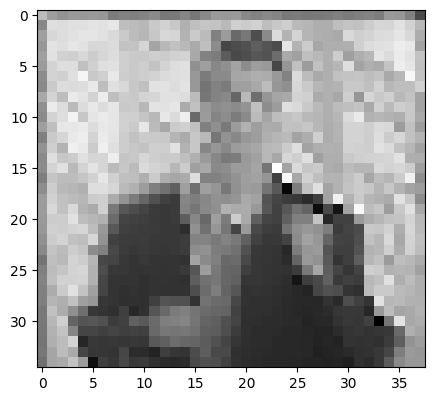

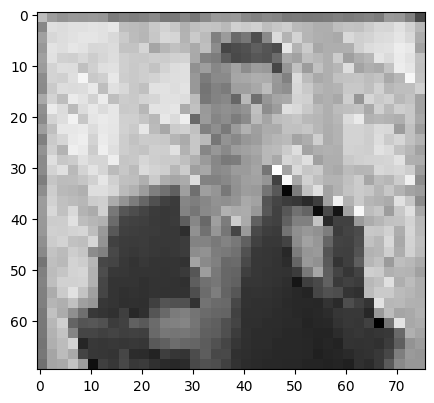

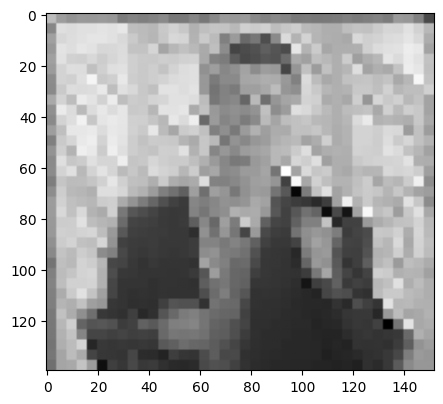

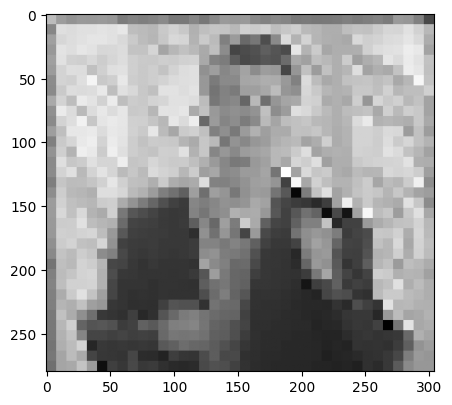

In [108]:
# Let's re-upsample, sub-sampled rick
data_duplicate = duplicate(data_subsample3);

plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_duplicate, cmap='gray')
plt.show()

data_duplicate2 = duplicate(data_duplicate)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate2, cmap='gray')
plt.show()

data_duplicate3 = duplicate(data_duplicate2)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate3, cmap='gray')
plt.show()

They look the same, but if you look at the axes, you'll see that the pixels are just duplicated.

In [126]:
# Now let's try max pooling back up
# The input x_high_res is the original high res image, from which you can deduce the position of the maximum index
def max_unpool(x_in, x_high_res):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  # TODO -- write the subsampling routine
  for i in range(x_in.shape[0]):
    for j in range(x_in.shape[1]):
      x = i * 2
      y = j * 2
      # Fill a 2x2 block in the output array
      actual_block = x_high_res[x:x + 2, y:y + 2]
      max_index = np.argmax(actual_block)
      max_index_in_shape = np.unravel_index(max_index, actual_block.shape)
      max_unpool_block = np.zeros((2, 2))
      max_unpool_block[max_index_in_shape] = actual_block[max_index_in_shape]
      x_out[x:x + 2, y:y + 2] = max_unpool_block
  return x_out

In [127]:
print("Original:")
print(orig_2_2)
print("Max unpooled:")
print(max_unpool(orig_2_2,orig_4_4))

Original:
[[6 8]
 [8 4]]
Max unpooled:
[[0. 0. 0. 0.]
 [6. 0. 0. 8.]
 [0. 0. 0. 4.]
 [0. 8. 0. 0.]]


In [ ]:
# Let's re-upsample, sub-sampled rick
data_max_unpool= max_unpool(data_maxpool3,data_maxpool2);

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool, cmap='gray')
plt.show()

data_max_unpool2 = max_unpool(data_max_unpool, data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool2, cmap='gray')
plt.show()

data_max_unpool3 = max_unpool(data_max_unpool2, data)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool3, cmap='gray')
plt.show()

Finally, we'll try upsampling using bilinear interpolation.  We'll treat the positions off the image as zeros by padding the original image and round fractional values upwards using np.ceil()

In [ ]:
def bilinear(x_in):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  x_in_pad = np.zeros((x_in.shape[0]+1, x_in.shape[1]+1))
  x_in_pad[0:x_in.shape[0],0:x_in.shape[1]] = x_in
  # TODO -- write the duplication routine
  # Replace this line
  x_out = x_out

  return x_out

In [ ]:
print("Original:")
print(orig_2_2)
print("Bilinear:")
print(bilinear(orig_2_2))

In [ ]:
# Let's re-upsample, sub-sampled rick
data_bilinear = bilinear(data_meanpool3);

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_bilinear, cmap='gray')
plt.show()

data_bilinear2 = bilinear(data_bilinear)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear2, cmap='gray')
plt.show()

data_bilinear3 = duplicate(data_bilinear2)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear3, cmap='gray')
plt.show()